In [2]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [3]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head()
dfLE.describe()


,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
count,191.000000,183.000000,183.000000,191.000000,189.000000,182.000000,191.000000,187.000000,191.000000,191.000000,191.000000,1.910000e+02,1.440000e+02,178.000000
mean,0.167539,69.224932,164.796448,29.133835,4.486793,79.287713,2326.165576,39.117146,40.412631,82.832863,82.628740,4.550119e+10,1.265734e+07,12.027739
std,0.374438,9.186432,96.185159,113.691604,3.873123,17.417697,7924.050116,17.175529,154.310693,15.925330,16.433269,1.305612e+11,3.827961e+07,3.104852
min,0.000000,46.112500,18.750000,0.000000,0.010000,9.000000,0.000000,5.200000,0.000000,29.812500,26.812500,0.000000e+00,2.920000e+02,1.531250
25%,0.000000,62.475000,80.406250,0.000000,1.000000,68.150000,4.781250,20.887500,0.000000,72.000000,72.375000,4.776139e+06,9.623203e+05,9.971875
50%,0.000000,72.487500,146.562500,2.625000,3.582667,83.376068,138.937500,43.843750,3.250000,88.187500,88.500000,2.662176e+09,3.665163e+06,12.359375
75%,0.000000,75.106250,219.593750,21.062500,7.466000,94.687500,1501.593750,52.275000,25.281250,96.062500,96.031250,1.508067e+10,1.034789e+07,14.093750
max,1.000000,82.537500,550.062500,1366.687500,13.497333,99.000000,65857.937500,87.300000,1812.500000,99.000000,99.000000,1.004677e+12,4.214677e+08,20.037500


<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [4]:
#Part 1

dfLE['GDP per Capita'] = dfLE['GDP']/dfLE['Population']
dfLE[['Country','GDP per Capita']].sample(n=10)

,Country,GDP per Capita
73,Honduras,1508.150265
65,Ghana,1101.246999
113,Mozambique,306.072088
28,Cambodia,508.830482
49,Dominica,NaN
0,Afghanistan,414.824126
119,NewZealand,NaN
17,Benin,385.922328
168,Thailand,3900.215126
183,Uruguay,7304.866699


### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

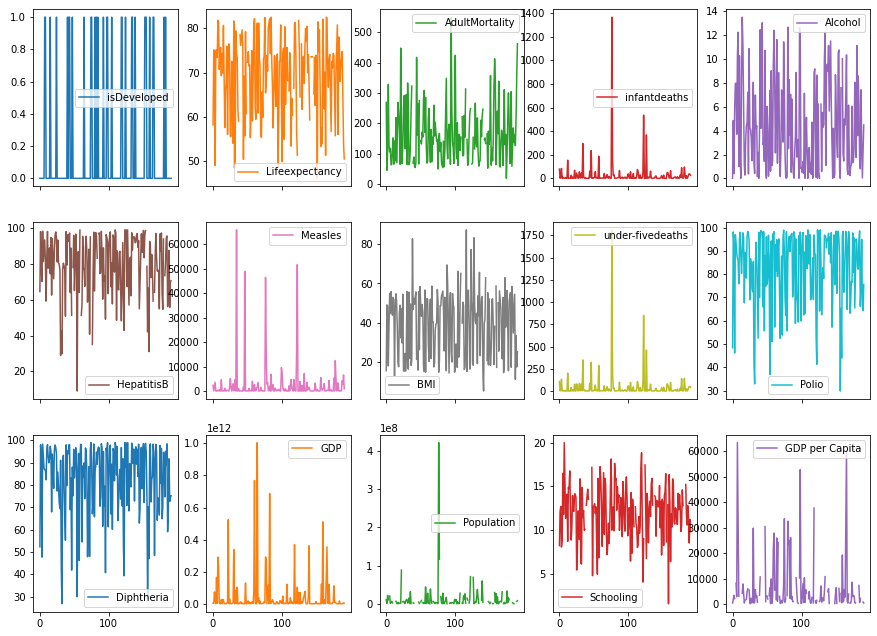

In [5]:
#distribution plots
dfLE.plot(subplots=True, layout=(4,5),figsize=(15,15))

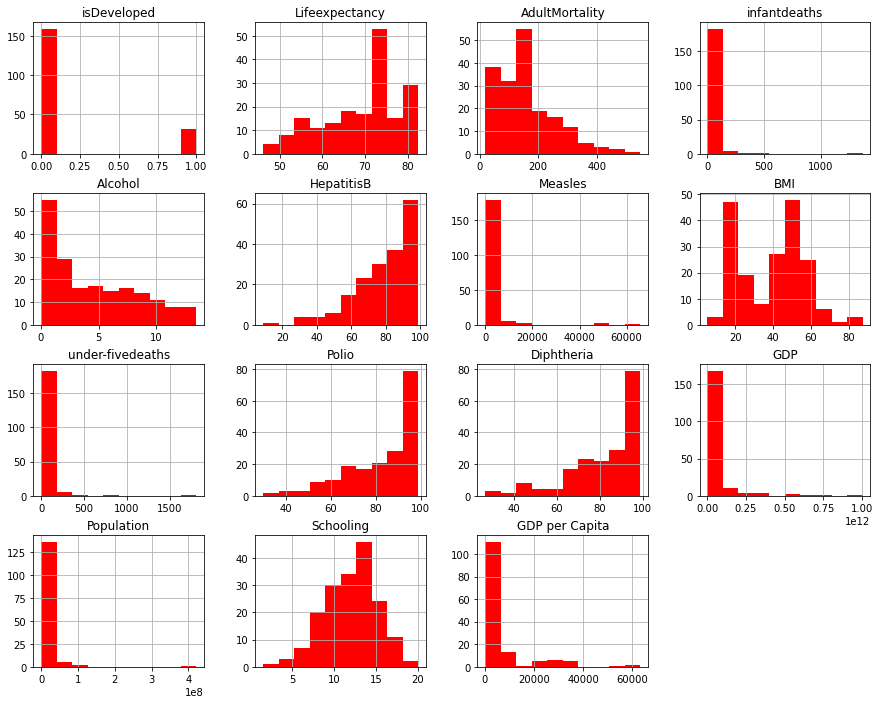

In [6]:
from turtle import color
#distribution plots- histograms
dfLE.hist(layout=(5,4),figsize=(15,15),color= 'red')
plt.title("distribution plots")
plt.show()

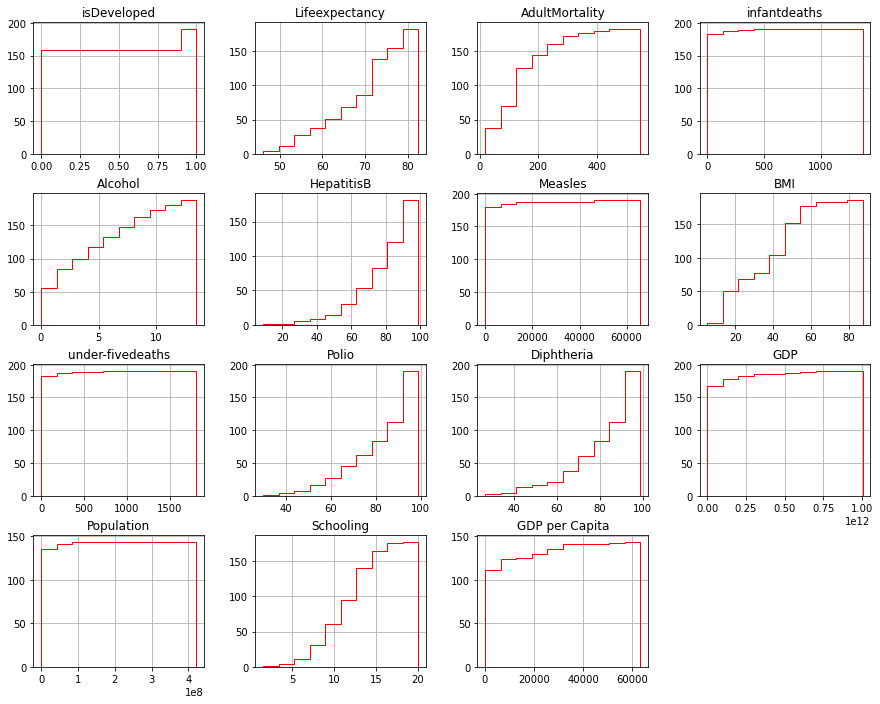

In [7]:
#cumulative density plots
dfLE.hist(layout=(5,4),figsize=(15,15),color= 'red',cumulative=True, histtype='step',label='cdf')
plt.show()

### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

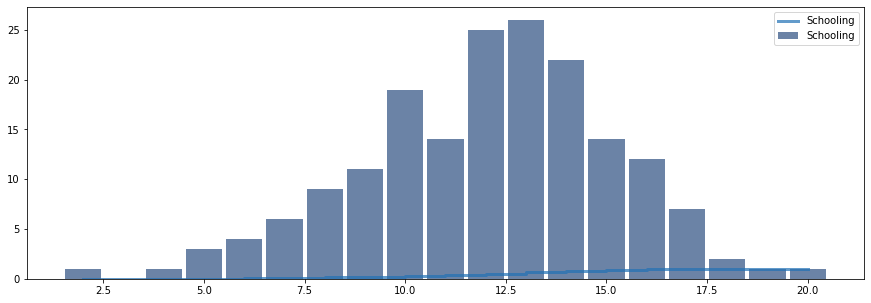

In [8]:
#Analytical for Scholing
#Histogram
hist = thinkstats2.Hist(round(dfLE["Schooling"],0), label="Schooling")
thinkplot.Hist(hist)
thinkplot.Config()
#CDF look
cdf = thinkstats2.Cdf(hist)
thinkplot.Cdf(cdf)
thinkplot.Config()

it seems like normal bell curve shape.

<AxesSubplot:xlabel='Schooling', ylabel='Density'>

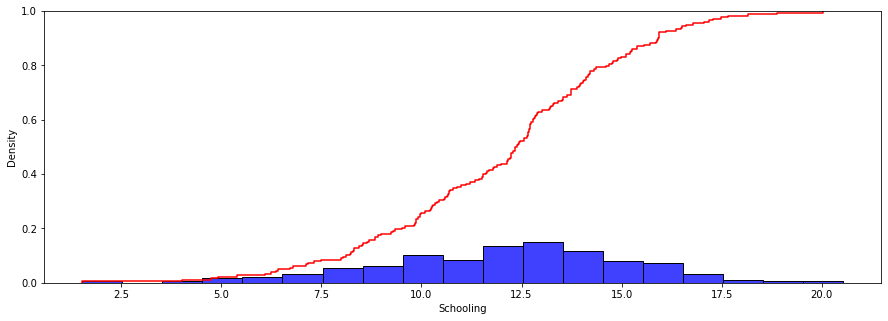

In [9]:
#using seaborn
sns.histplot(data=dfLE["Schooling"], binwidth=1, color="blue", stat="density")
sns.ecdfplot(data=dfLE["Schooling"],color="red")

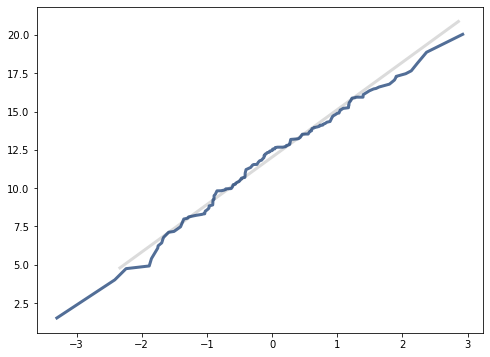

In [10]:
schooling= dfLE["Schooling"]
schooling = schooling[~np.isnan(schooling)]
thinkplot.clf()
thinkstats2.NormalProbabilityPlot(schooling)

0.00019131987908833196

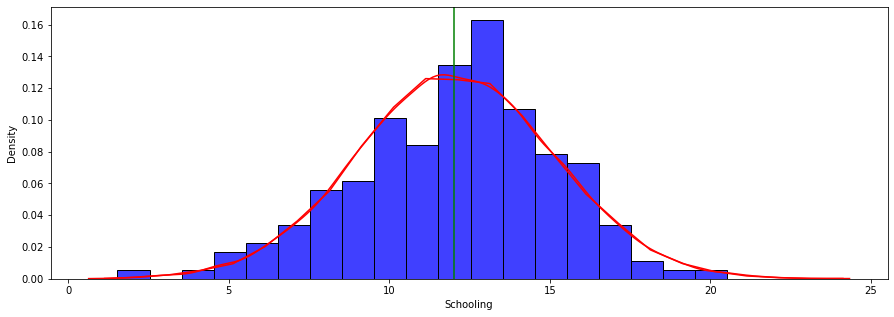

In [11]:
#Mean and medain
mu = dfLE["Schooling"].mean()
sigma = dfLE["Schooling"].std()
# analytical distribution
import scipy.stats
schoolingN = scipy.stats.norm(mu,sigma)
#emperical and analytical distribution

sns.histplot(data=schoolingN.rvs(10000), binwidth=1, color="red", stat="density", kde=True, element="poly", fill=False)
sns.histplot(data=round(dfLE["Schooling"],4), binwidth=1, color="blue", stat="density")
plt.axvline(mu, color="green")

In [45]:
df2=dfLE.index[dfLE["Country"]=="Canada"]
canvalue= dfLE.loc[df2.values[0],"Schooling"]
oneyearless = schoolingN.cdf(canvalue-1)
oneyearmore = schoolingN.cdf(canvalue+1)
print(" prediction for schooling level within one year of canada",((oneyearmore-oneyearless)*100),"%")


 prediction for schooling level within one year of canada 12.032230030119617 %


### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

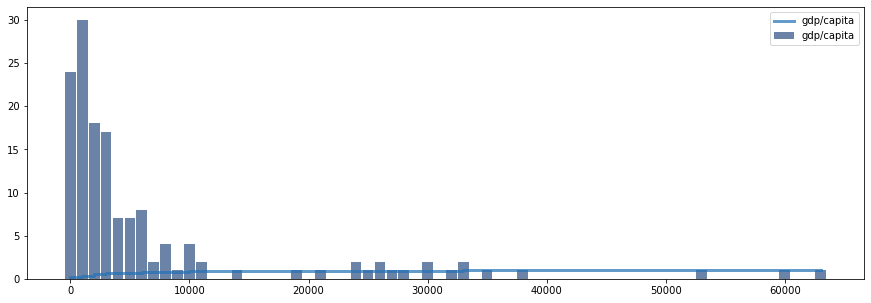

In [13]:
#Analytical for GDP/capita
hist = thinkstats2.Hist(round(dfLE["GDP per Capita"],-3), label="gdp/capita")
thinkplot.Hist(hist)
thinkplot.Config()
#CDF look
cdf= thinkstats2.Cdf(hist)
thinkplot.Cdf(cdf)
thinkplot.Config()

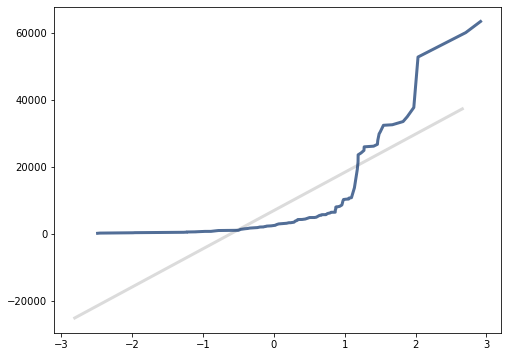

In [14]:

gdppercapita = dfLE["GDP per Capita"]
gdppercapita = gdppercapita[~np.isnan(gdppercapita)]
thinkplot.clf()
thinkstats2.NormalProbabilityPlot(gdppercapita)

it does not follow normal distribution,so choosing lognormal c=shape

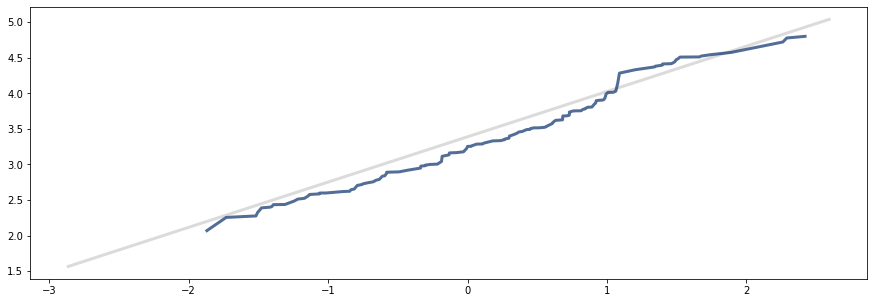

In [15]:
thinkstats2.NormalProbabilityPlot(np.log10(gdppercapita))

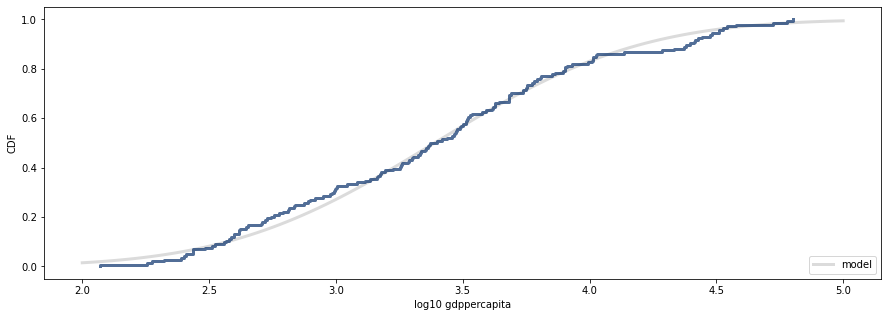

In [16]:
log_gdppercapita = np.log10(dfLE["GDP per Capita"])
cdf_log = thinkstats2.Cdf(log_gdppercapita)
#Compare distribution to LogNormal
mu2, sigma2 = log_gdppercapita.mean(), log_gdppercapita.std()
xs, ps = thinkstats2.RenderNormalCdf(mu2, sigma2,low=2, high=5)
thinkplot.Plot(xs, ps, label='model', color='0.8')
thinkplot.Cdf(cdf_log) 
thinkplot.Config(xlabel='log10 gdppercapita', ylabel='CDF', loc='lower right')

analytical distribution seems to fit lognormal distribution for gdp per capita except in some areas.

### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

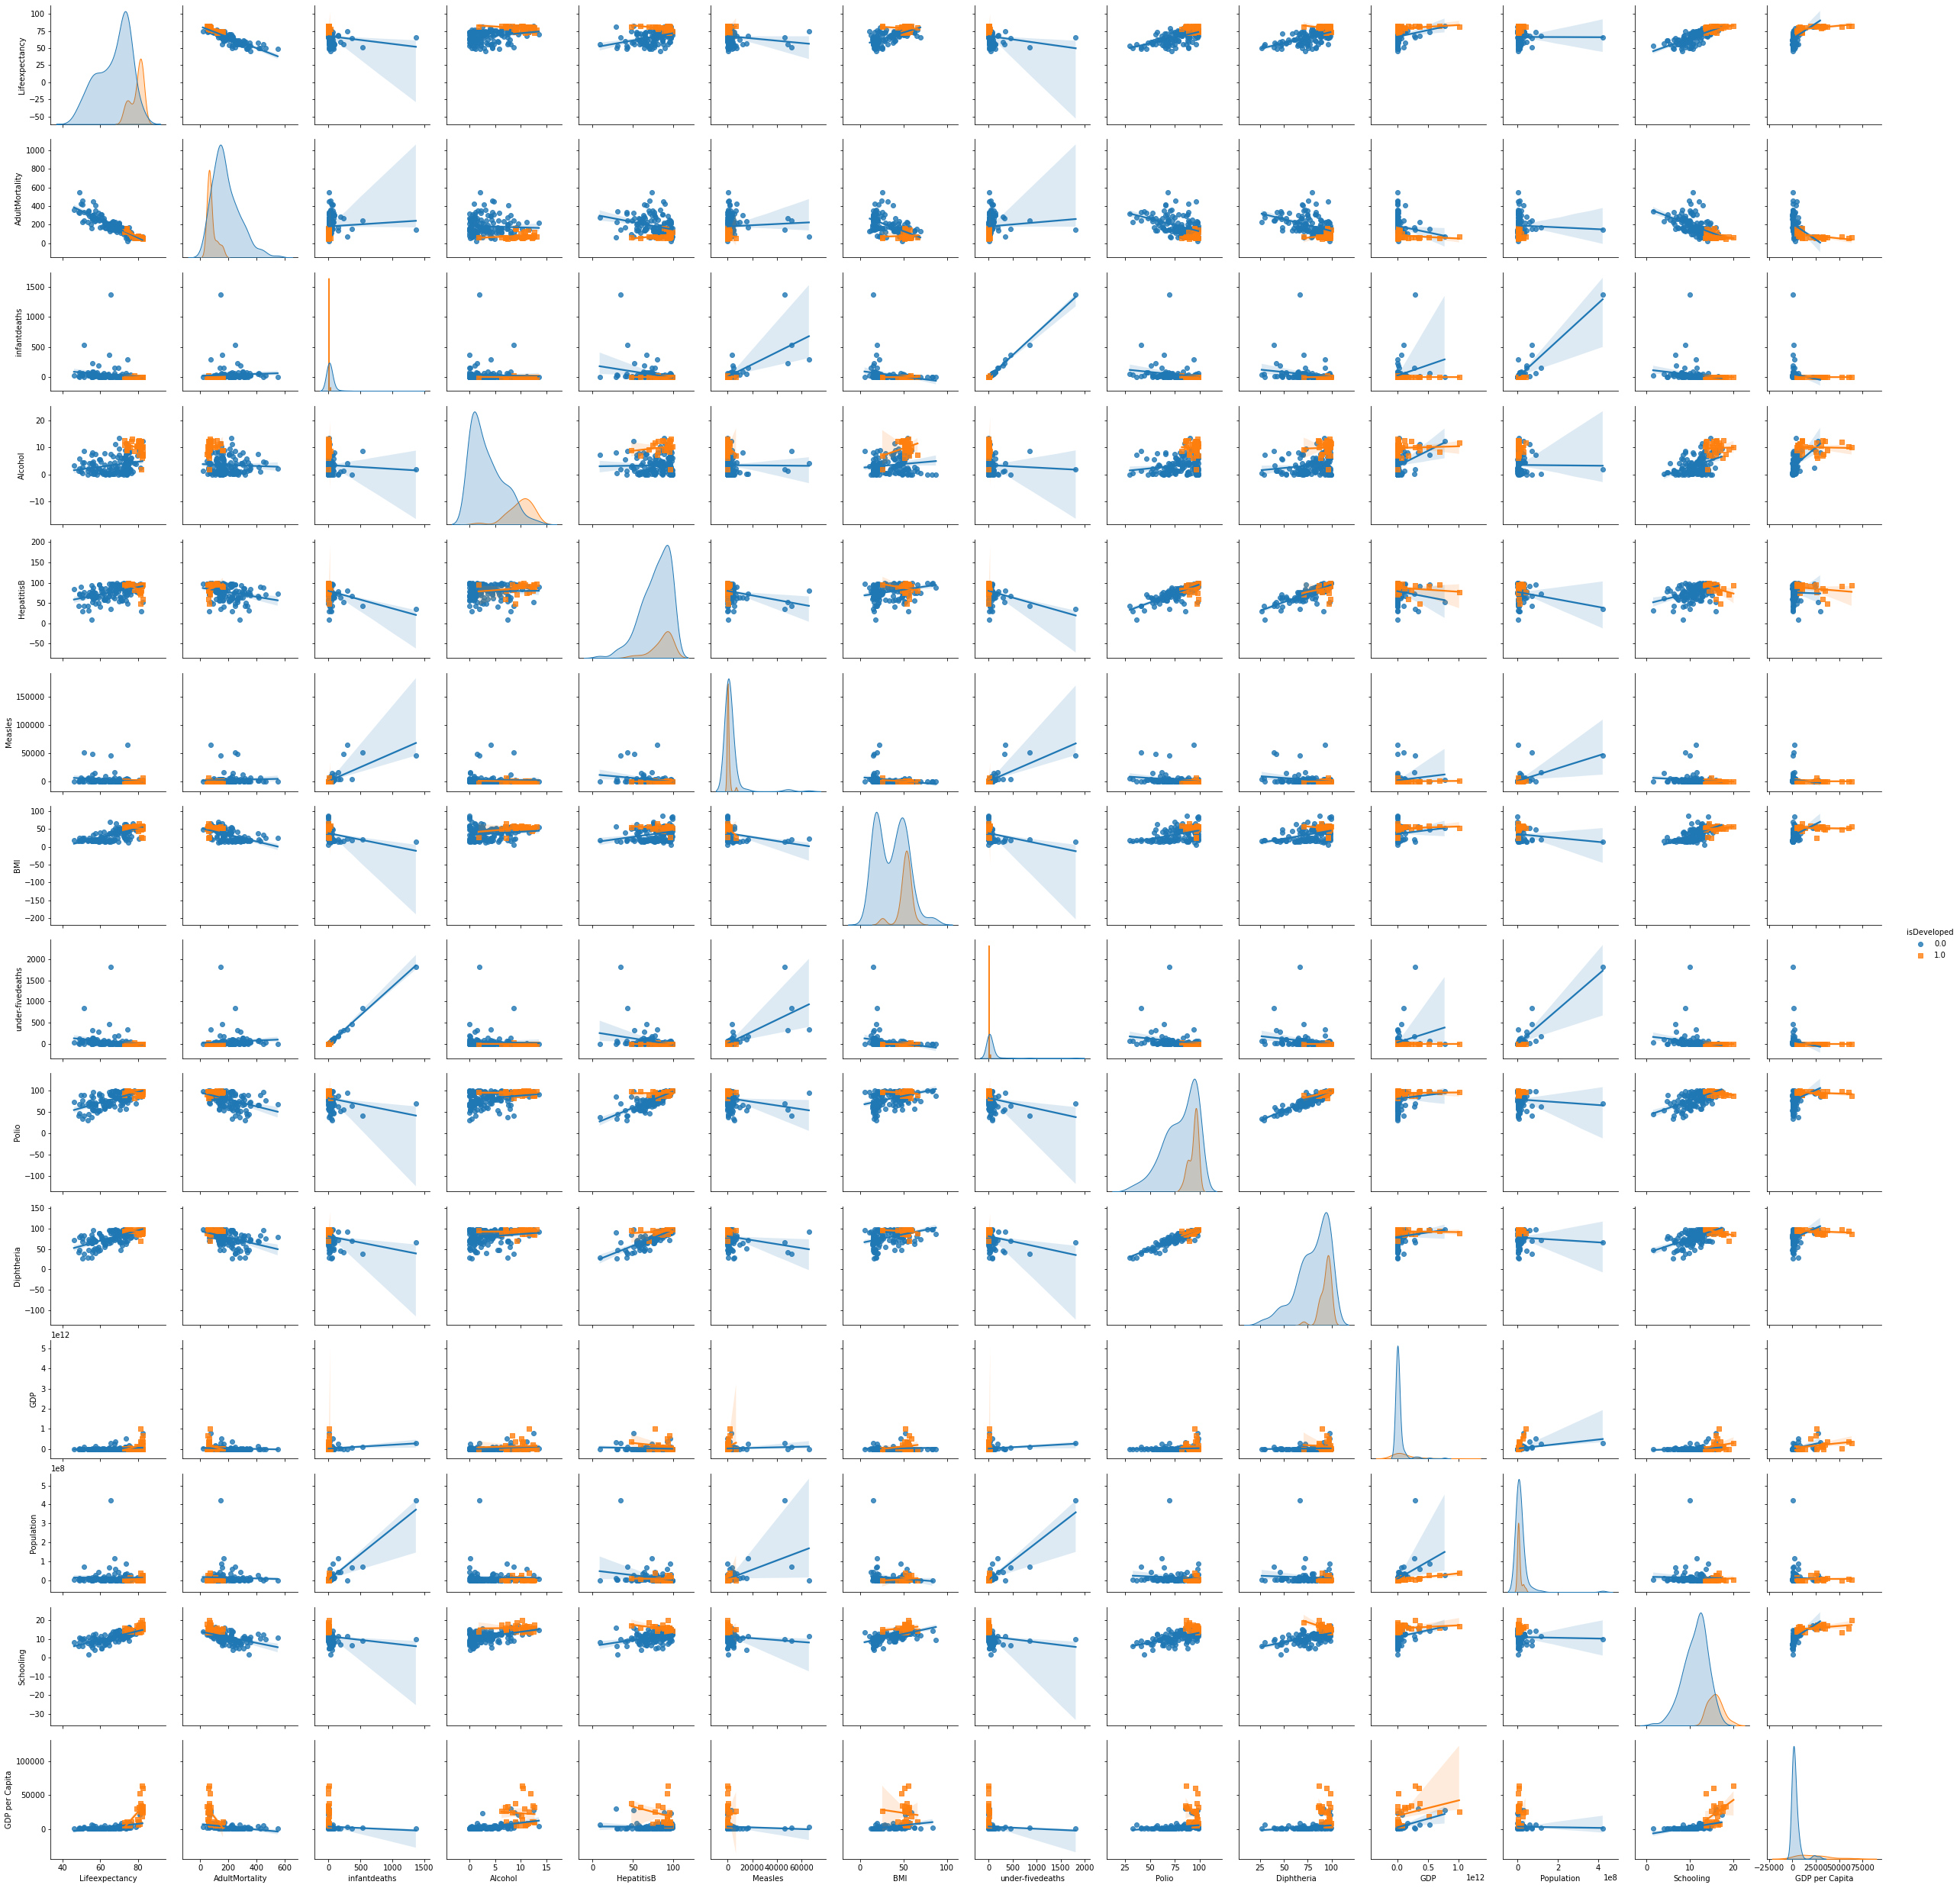

In [17]:
#Visualize correlations. 
plt.rcParams["figure.figsize"] = (20,7)
sns.pairplot(dfLE, dropna=True, kind="reg",hue="isDeveloped",markers=["o","s"],height=2.5,aspect=1)
plt.show()

In [18]:
#Filter out negatives
df_filtered= dfLE[dfLE["Lifeexpectancy"] > 0]
df_filtered= dfLE[dfLE["infantdeaths"] > 0]
df_filtered =dfLE[dfLE["Alcohol"] > 0]
df_filtered= dfLE[dfLE["BMI"] > 0]
df_filtered= dfLE[dfLE["HepatitisB"] <100]
df_filtered= dfLE[dfLE["Polio"] > 0]
df_filtered= dfLE[dfLE["Diphtheria"] > 0]
df_filtered= dfLE[(dfLE["Schooling"] > 0) & (dfLE["Schooling"]<20)]
df_filtered= dfLE[dfLE["GDP per Capita"] > 0]
#filtering out other outliers
df_filtered= dfLE[dfLE["infantdeaths"] <500]
df_filtered= dfLE[dfLE["HepatitisB"] < 10000]
df_filtered= dfLE[(dfLE["under-fivedeaths"] >0) & (dfLE["under-fivedeaths"]<1000)]
df_filtered= dfLE[dfLE["AdultMortality"] < 500]
df_filtered= dfLE[dfLE["Measles"] > 10000]
df_filtered= dfLE[dfLE["GDP per Capita"] < 10000]

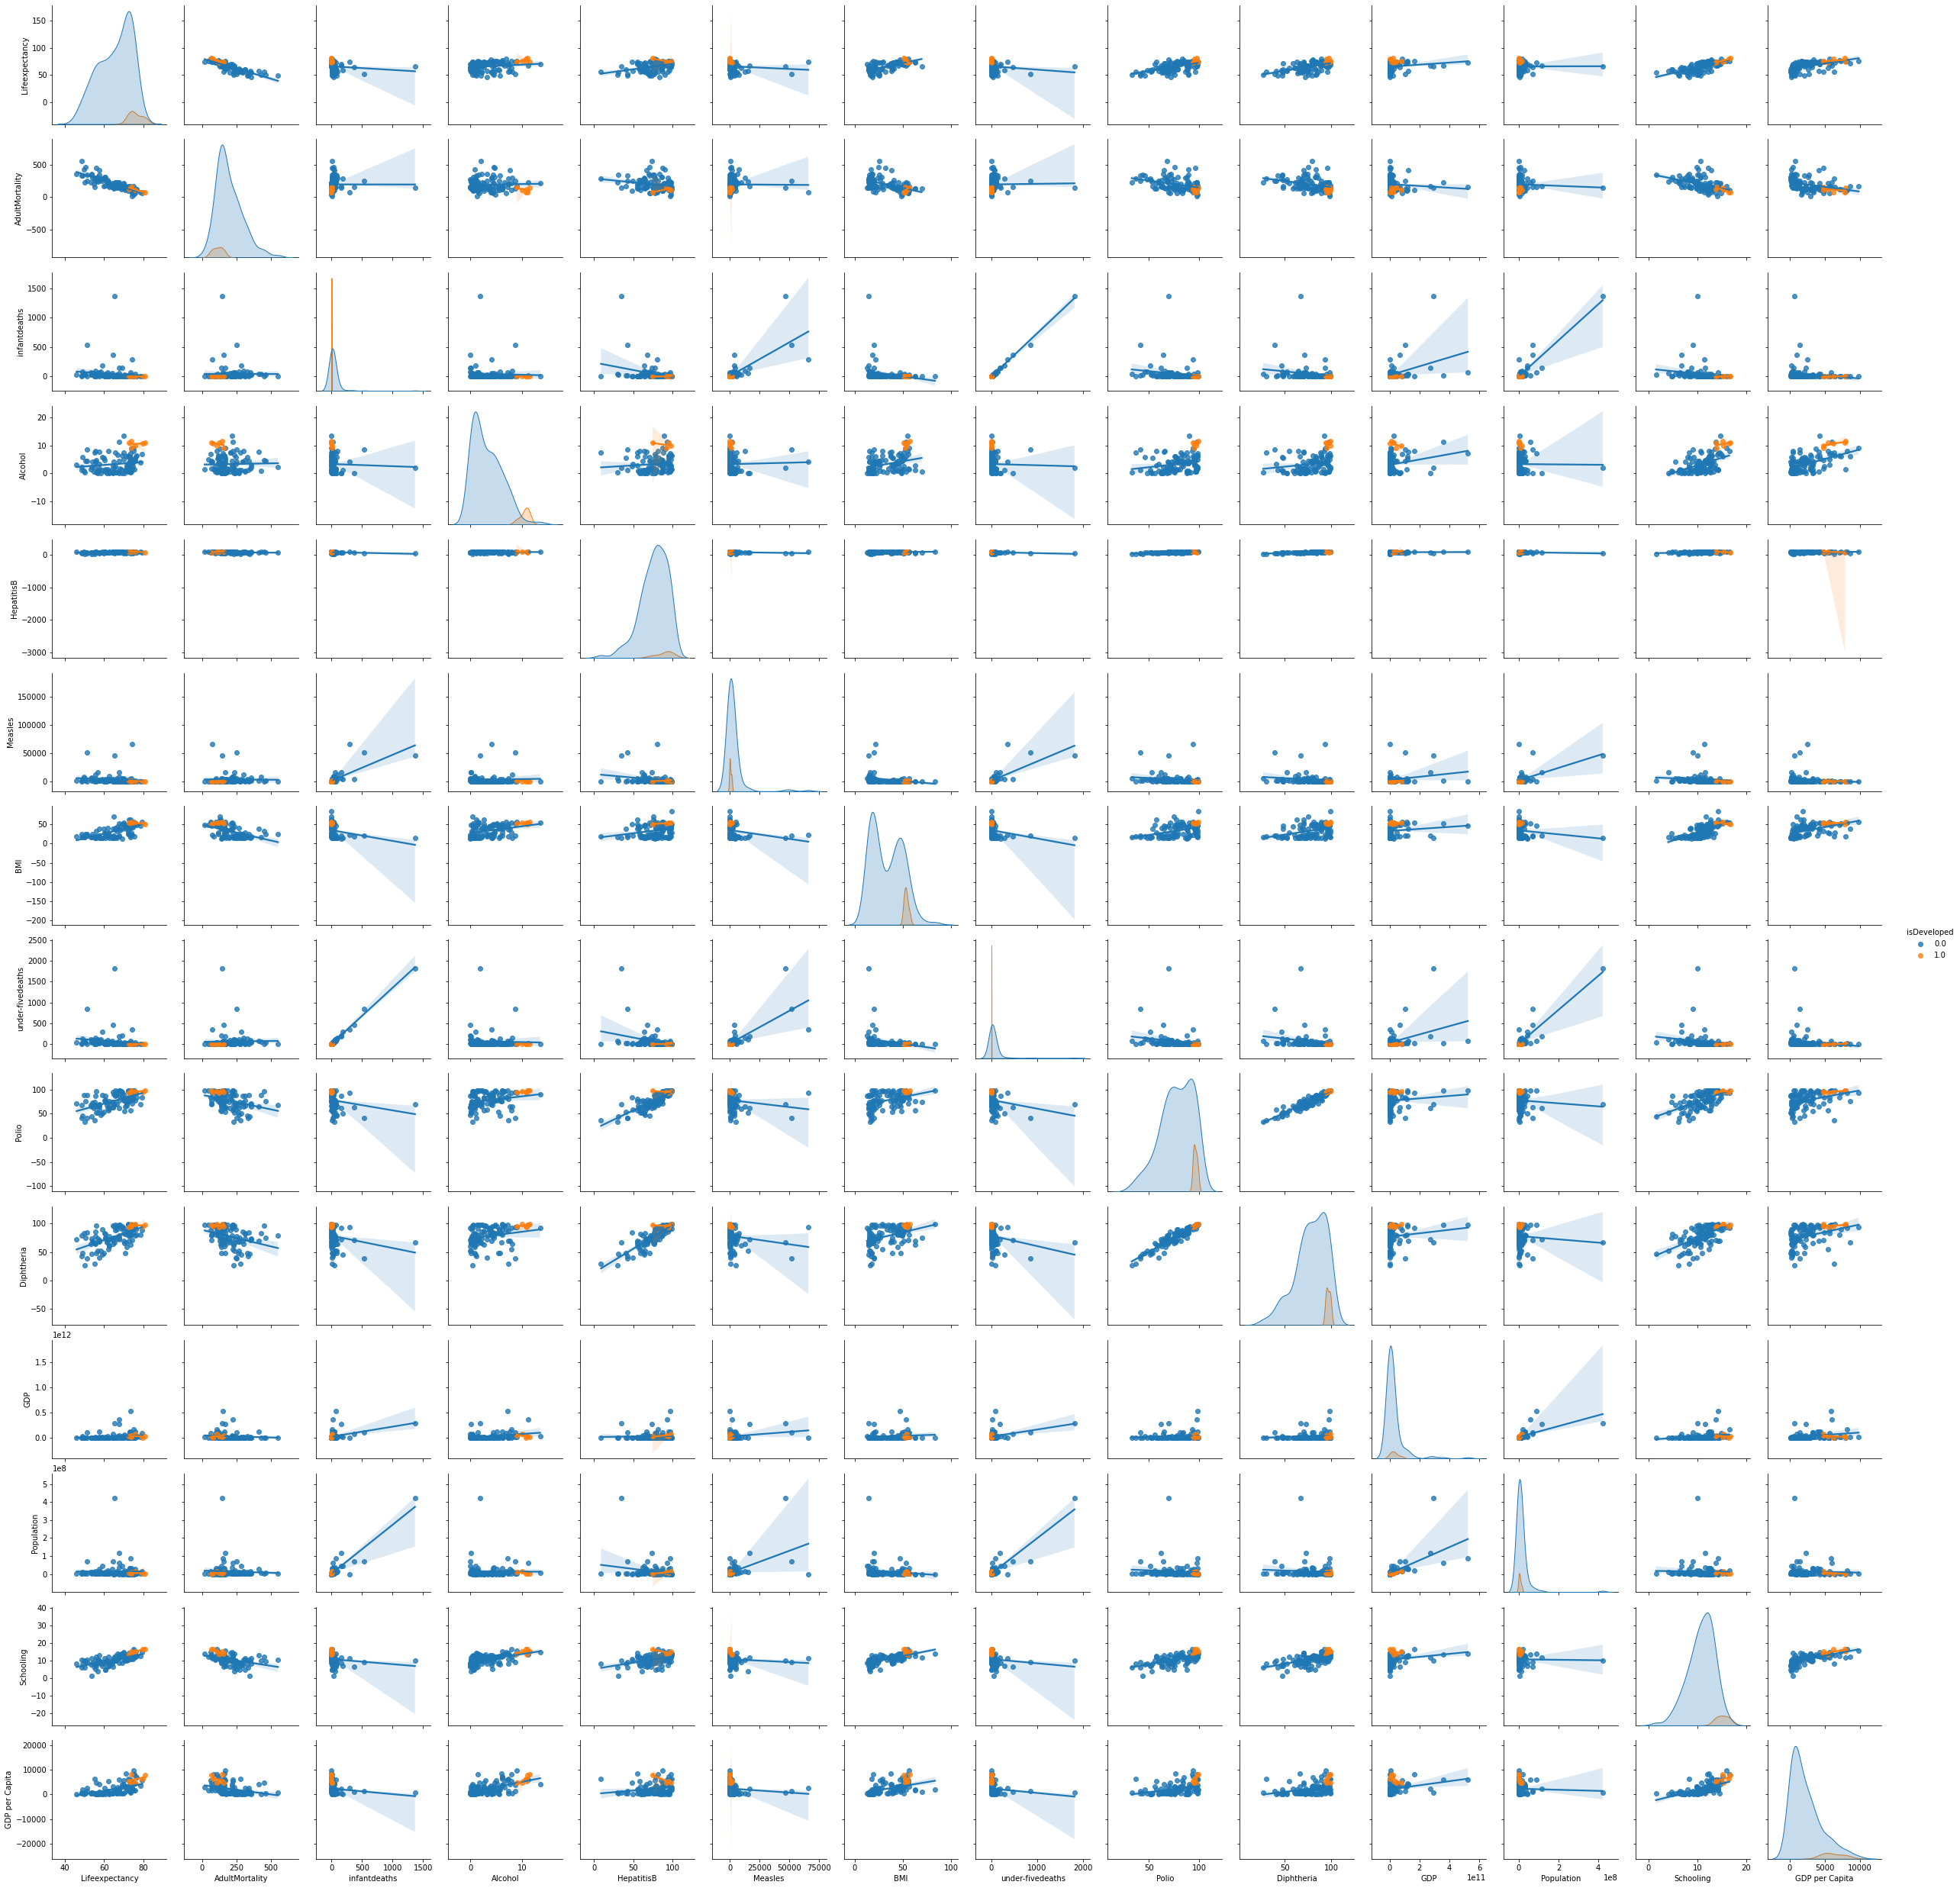

In [19]:
sns.pairplot(df_filtered, dropna=True, kind="reg",hue="isDeveloped")
plt.show()

there are many factors that affect life expectancy for both developing countries(shown in blue) and developed countries( shown in orange).Infant deaths can reduce number of people living to old age,hence decreasing overall life expectancy.it is also associated with mother's health which may reduce life expectancy.

### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

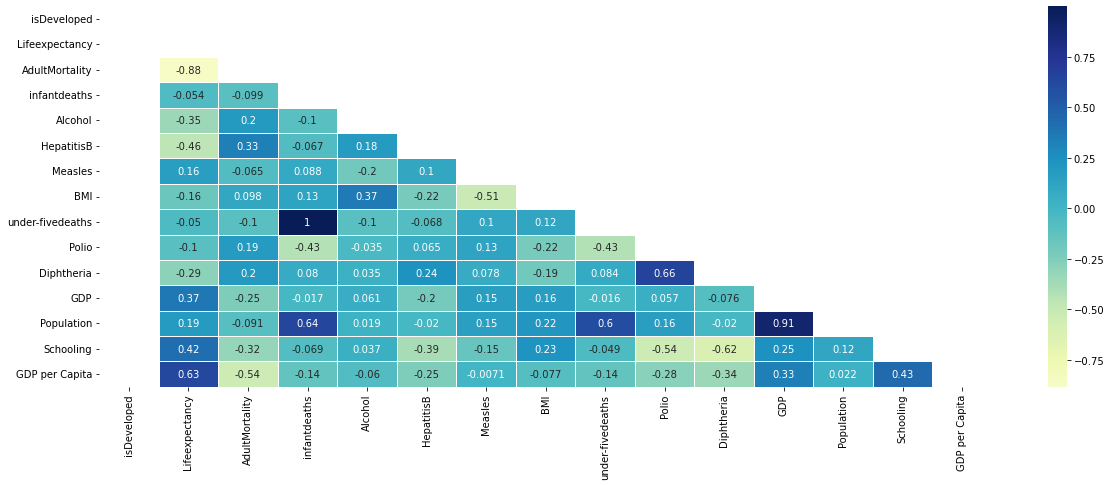

In [20]:
#heatmap for developed countries
df_developed = dfLE[dfLE["isDeveloped"]==1]
mask = np.triu(np.ones_like(df_developed.corr(), dtype=bool))
sns.heatmap(df_developed.corr(), center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

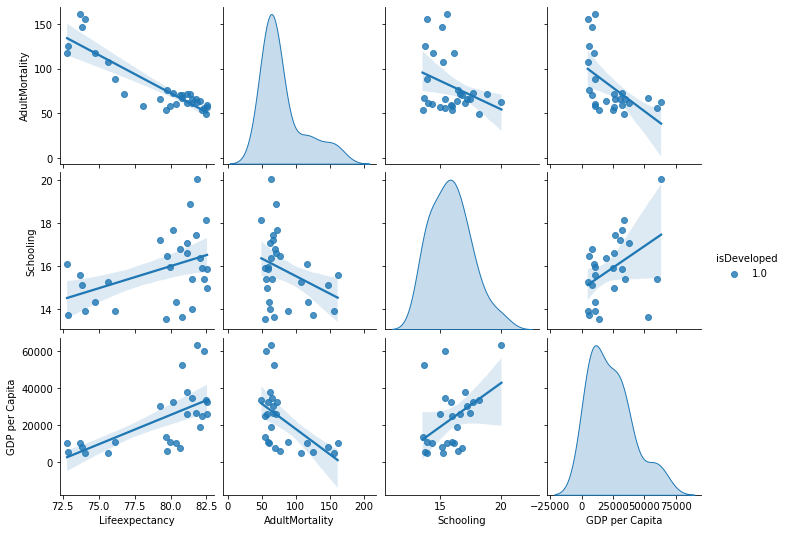

In [21]:
#plot of correlations
sns.pairplot(df_developed,x_vars=["Lifeexpectancy","AdultMortality","Schooling","GDP per Capita"],y_vars=["AdultMortality","Schooling","GDP per Capita"],dropna=True, kind="reg",hue="isDeveloped")
plt.show()

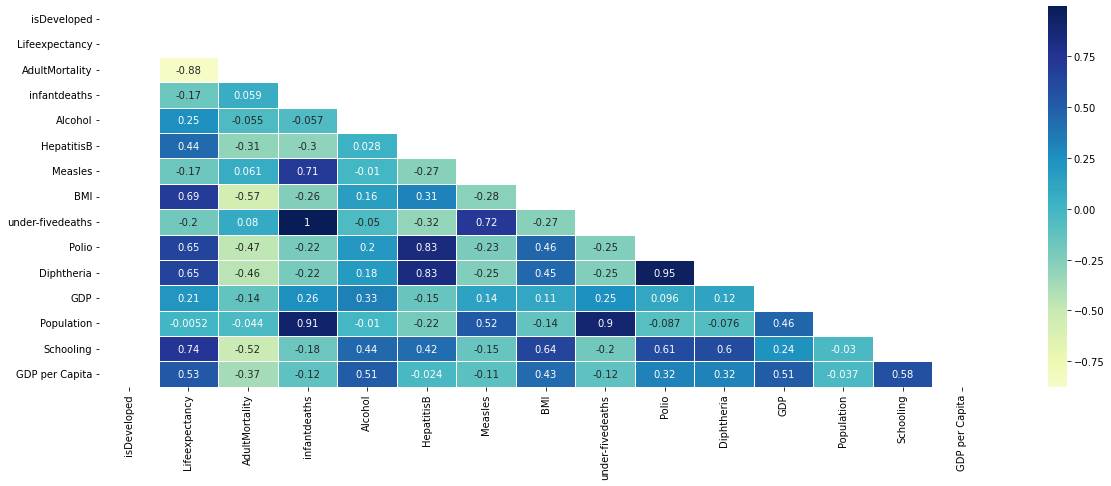

In [22]:
#developing countries heatmap
df_notdeveloped = dfLE[dfLE["isDeveloped"]==0]
mask = np.triu(np.ones_like(df_notdeveloped.corr(), dtype=bool))
sns.heatmap(df_notdeveloped.corr(), center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

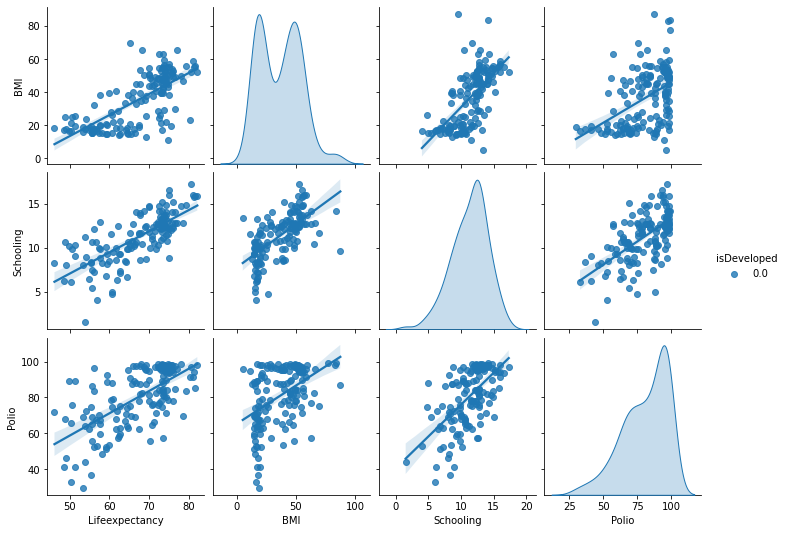

In [23]:
sns.pairplot(df_notdeveloped,x_vars=["Lifeexpectancy","BMI","Schooling","Polio"],y_vars=["BMI","Schooling","Polio"],dropna=True, kind="reg",hue="isDeveloped")
plt.show()

for developed countries- life expectancy is related with 1)adultmortality 2)gdp per capita 3)schooling
for developing countries- 1)adultmortality 2)BMI 3)polio

Life Expectancy has high negative correlation with adultmortality for both developed and developing countries.less deaths means high life expectancy.
GDP per Capita also has a positive correlation with Life expectancy, which can be inferred that as the country's GDP increases, more available resources,the life expectancy also increases.Schooling also has positive correlation with life expectancy as with high years of schooling will lead to better adoption of healthy habits and people will be more aware to adopt precautions which will lead to high life expectancy.
These seem to be supported by reality as European countries having high GDP per Capita has high life expectancy.
For developing coutries,
BMI has positive correlation with life Expectancy.People who fall outside BMI,i.e.obese has more chances of suffering from diabetic,cardiovascular diseases etc,leading to less life span.
These seem to be supported by reality as European countries having high GDP per Capita has high life expectancy.
for BMI,study find that life expectancy was shorter in obese(source- DOI:https://doi.org/10.1016/S2213-8587(18)30288-2).
As polio is highly contagious and target children less than 5,it is related to life expectancy as 5 to 10% children infected with polio dies when their breathing muscles become immobile.

#  places where developed coutries differ from developing countries,relationship of polio,hepatitisB and infant deaths regards to developing and developed countries-
Correlation coefficient differs for both-developing and developed countries.possible reason could be availability of preventive measures like-vaccines and drugs for almost every developed country and most of developing countries but still there are many  developing countries like Afganistan and pakistan where it still exists.
infant deaths has negative corelation with life expectancy for both developing and developed countries. but on comparing,we can see that for developing countries,infant deaths has higher negative correlation index which means better health conditions in developed countries.
graphs below supports our theory.

In [24]:
# examples of presence of polio in developing countries
df3=dfLE[(dfLE["Country"]=="Afghanistan")]
df4=dfLE[(dfLE["Country"]=="Pakistan")]
print(df3[["Country","Polio"]])
print(df4[["Country","Polio"]])


       Country   Polio
0  Afghanistan  48.375
      Country    Polio
126  Pakistan  64.1875


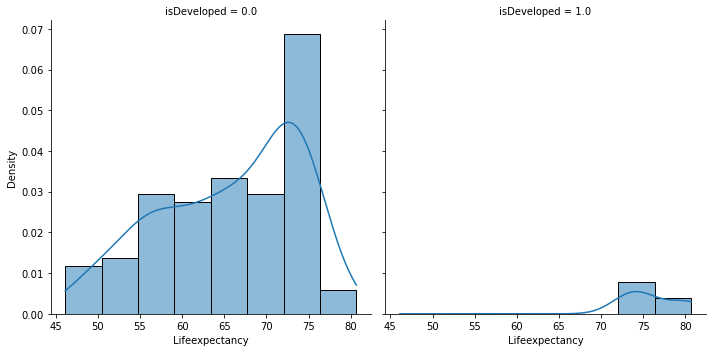

In [25]:
#graphs for developed and developing countries. 
sns.displot(data=df_filtered, x="Lifeexpectancy", kde=True, col="isDeveloped", stat="density")

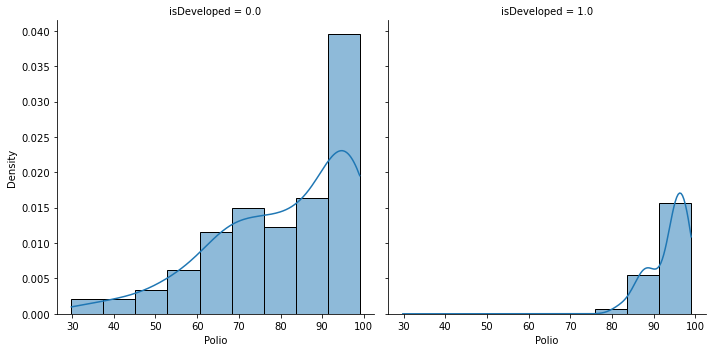

In [26]:
#presence of polio in developed vs developing countries.
sns.displot(data=dfLE, x="Polio", kde=True, col="isDeveloped", stat="density")

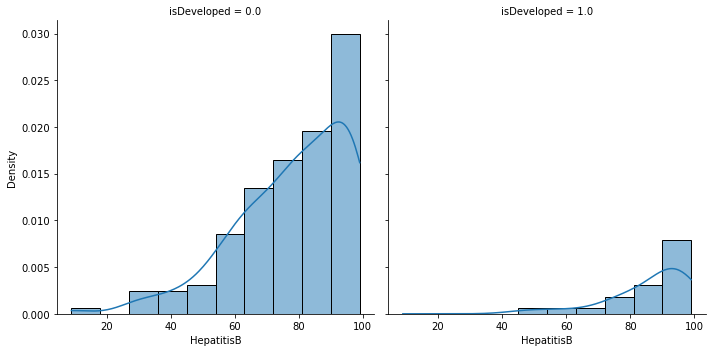

In [27]:
sns.displot(data=dfLE, x="HepatitisB", kde=True, col="isDeveloped", stat="density")

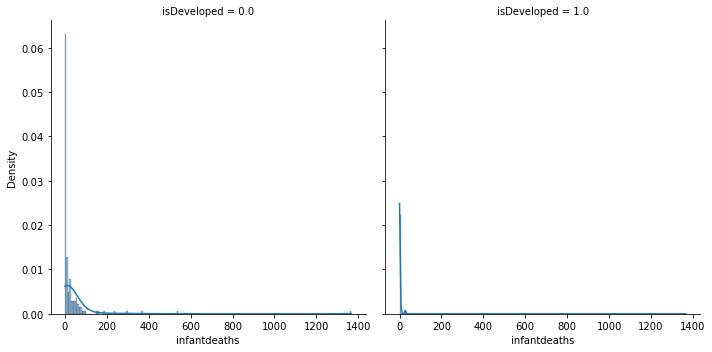

In [28]:
sns.displot(data=dfLE, x="infantdeaths", kde=True, col="isDeveloped", stat="density")